# Assessment 2

Student Name:      **Maryam Mahmoodi**

Student Number:    **30155843**

# Question 1 Bayes' theorem
In this question, you will apply Bayes' Theorem to calculate the probability that a patient has lung cancer given the chest x-ray result is positive. The probabilities are estimated from a synthetic dataset, hence do not represent the actual probabilities.

Assuming the probability of having lung cancer is $2.95\%$. If a patient has lung cancer, then the chest x-ray test has $96\%$ chance of getting positive result. On the other hand, if a patient does not have lung cancer, then the x-ray has $8\%$ chance of showing positive result. What is the probability that a patient has lung cancer given that the x-ray result is positive? 

__Total marks 10__. If numerator is calculated correctly 5 marks. If denominator is calculated correctly 5 marks. 

**Law of Total Probability Theorem**

$$Pr[x = 1] = Pr[x = 1 \cap c = 0] + Pr[x = 1 \cap c = 1]$$
$$Pr[x = 1] = Pr[x = 1 | c = 0]\times Pr[c=0] + Pr[x = 1 | c = 1]\times Pr[c=1]$$

In [1]:
p_c1 = 0.0295
p_x1_c1 = 0.96
p_x1_c0 = 0.08
p_c0 = 1 - p_c1
p_x1 = p_x1_c1 * p_c1 + p_x1_c0 * p_c0
p_x1

[1] 0.10596

# Question 2 Maximum likelihood estimation
A popular activation function for building an Aritifical Neural Network (ANN) is the hyperbolic tangent function (tanh)
\begin{align*}
g(z) = \frac{e^z-e^{-z}}{e^z + e^{-z}}
\end{align*}
that takes values on the real line and ranges from $-1$ to $1$, where $z=\sum_{i=0}^n x_i \beta_i$. In this questions, you will be asked to drive an equation for the maximum likelihood estimation of the tanh parameters.

__Total marks 15__. Derivation of ML estimation 7 marks. Implementation of the ML estimation 8 marks. 

In [2]:
# Data Generation
# this block of code is for generating test data that is used to confirm 
# your derivation and implementation of the ML estimation
set.seed(836217)
n = 1000
X = cbind(1, rnorm(n), rnorm(n))
Y = rep(-1, n)
beta = c(0.43, -1.7, 2.8)
for (i in 1:n) {
  z = (beta %*% X[i, ])[1]
  p = pnorm(z)
  if (runif(1) < p) Y[i] = 1
}

XTest = matrix(c(1, 1.0162462, -0.4012721, 1, -2.0693534, -0.2018362, 
                 1, -0.4812785, 0.2505587, 1, 1.1538629, 0.3152341, 
                 1, 0.4399999, 0.8282703), 5, 3, byrow = T)
YTest = c(-1, 1, 1, -1, 1)

a) Derive the ML estimation of the tanh parameters. 

$$L(g(z|\beta))=\frac{e^z-e^{-z}}{e^z + e^{-z}}$$
Differentiating the above equation and equating it to zero,
$$\frac{\partial L(g(z|\beta))}{\partial z} = \frac{4e^{2z}}{\left(e^z + e^{-z}\right)^2}\frac{\partial z}{\partial \beta}=0 $$
Or,
$$\frac{\partial z}{\partial \beta}=0$$


b) Implement the equation that you derived in part (a). You can test your implementation on the test data __XTest__ and __YTest__ provided above with $\vec{\beta} = (0.43, -1.7, 2.8)$. If done correctly, you should get the negative log (base e) likelihood equal to 0.2886433. Optimize the parameters using any numerical method 
available in R e.g., the __optim()__ function.

In [3]:
tanh <- function(z){
    return (exp(z)-exp(-z))/(exp(z)+exp(-z))
}

# Question 3 Central limit theorem
In this question, you will be asked to sample from a Beta distribution, then calculate and plot the sample mean in histogram to visualize the central limit theorem.

__Total marks 15__. Part a 2 marks, part b plot the sample means 10 marks, explain findings 3 marks. 

a) Sample $10000$ data from a __Beta(0.2, 0.2)__ distribution. Plot the samples in a histogram.

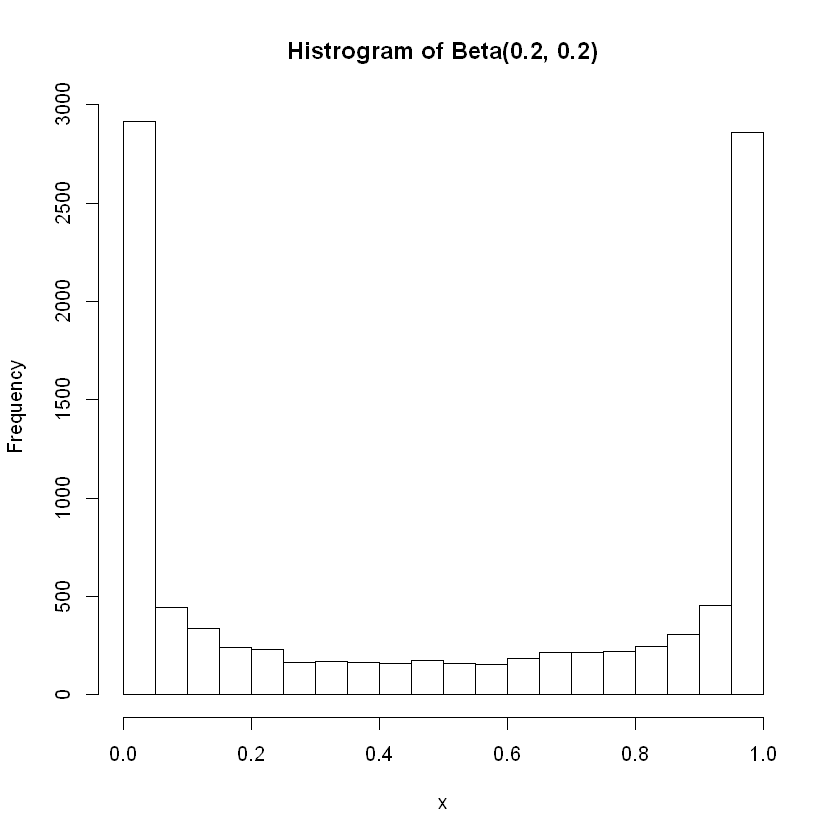

In [4]:
x <- rbeta(10000, 0.2, 0.2)
hist(x, 
    main='Histrogram of Beta(0.2, 0.2)')

b)
Sample from the same Beta distribution above. Repeat the sampling process for 10, 100, 1000, 10000 times. Each time draw 1, 5, 10, 30, 50, 100 samples. Calculate and plot the sample means in histograms. Explain your findings. 

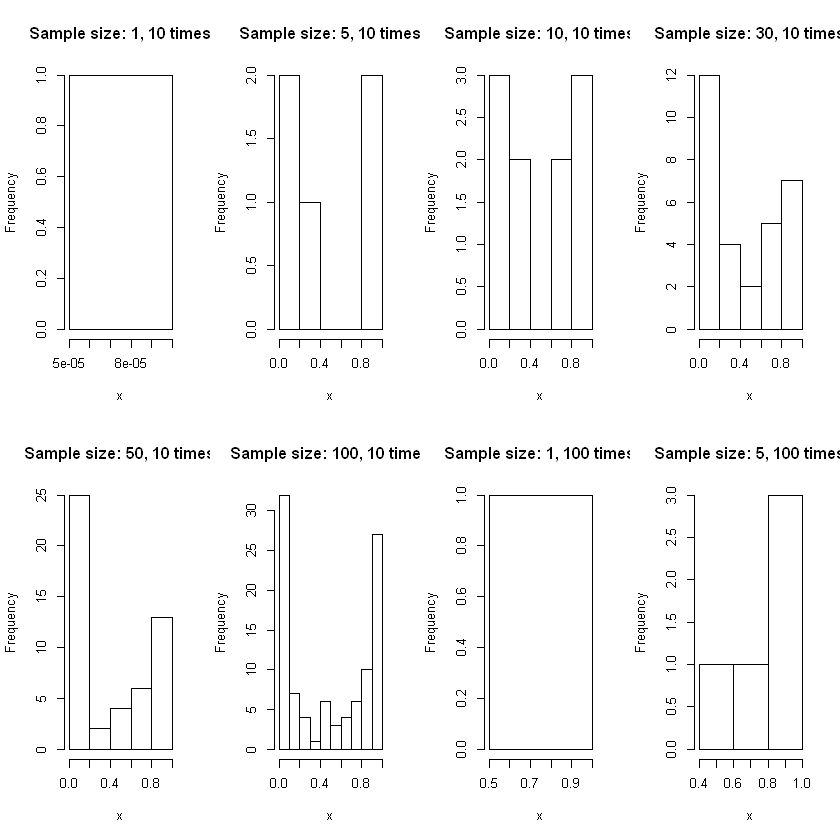

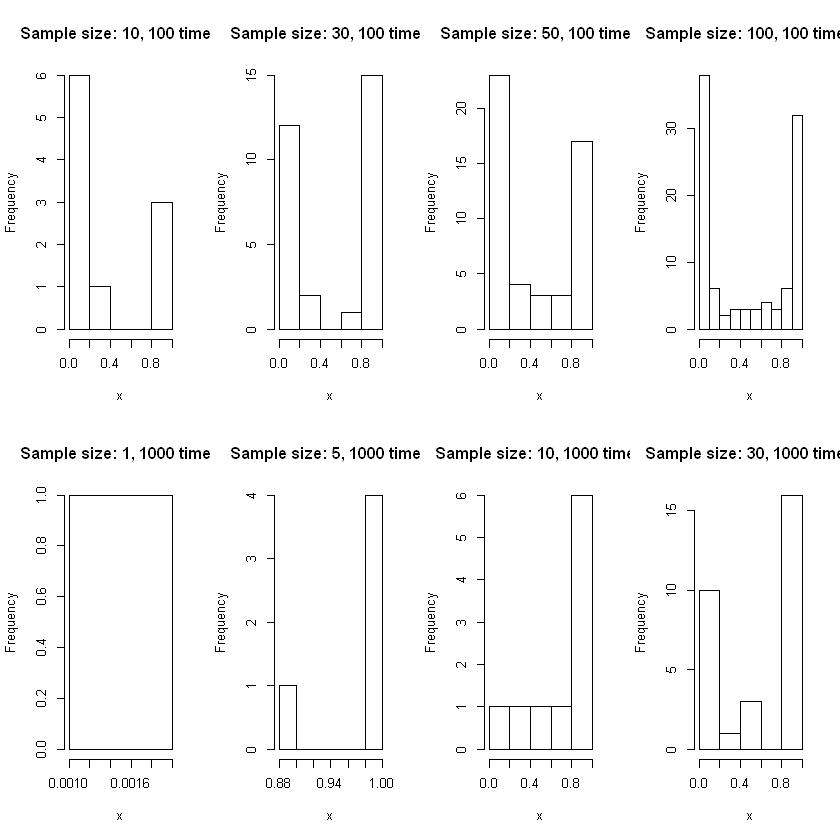

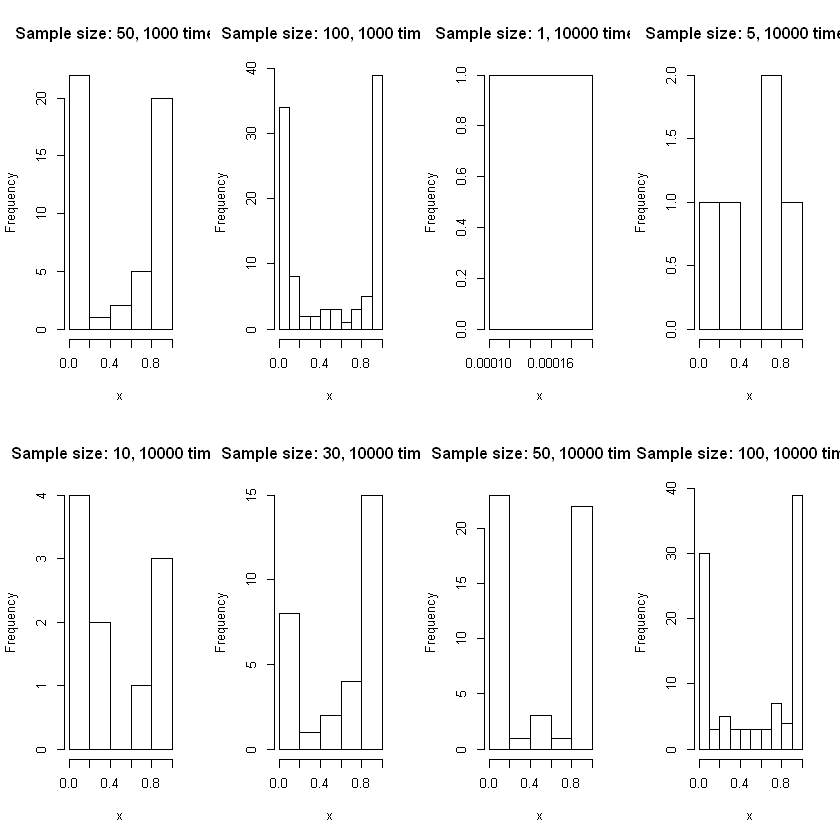

In [5]:
par(mfrow=c(2,4))
times <- c(10, 100, 1000, 10000)
samples <- c(1, 5, 10, 30, 50, 100)
for (tm in times) {
    for (smple in samples) {
        means <- rep(0, tm)
        for (index in tm) {
            x <- rbeta(smple, 0.2, 0.2)
        }
        hist(x,
             main=paste('Sample size: ',
                        smple,
                        ', ',
                        tm,
                        ' times',
                        sep = ''))
    }
}

As we are increasing the number of sample size and how many times we are simulating the data to get the means, the distribution of the sample means is reaching close to beta distribution

# Question 4 hypothesis test

You are provided with a data set called __iData.csv__ containing information on births recorded in a particular state.

__Total marks 15__. Each sub-question a, b, c worths 5 marks.

a) It is claimed that mothers' smoking habit does not have any effect on the birth weight of the babies. To verity this claim, you need to complete the following tasks: 

1. Construct a significance test, by writing a null hypothesis, and an alternative hypothesis,
2. perform the test using an appropriate R function,
3. Make a conclusion and explain your findings.

In [6]:
data <- read.csv('iData.csv')
head(data)

fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
19,15,younger mom,37,full term,11,married,38,6.63,not low,female,nonsmoker,white
21,15,younger mom,41,full term,6,married,34,8.00,not low,male,nonsmoker,white
18,15,younger mom,37,full term,12,married,76,8.44,not low,male,nonsmoker,not white
17,15,younger mom,35,premie,5,married,15,4.69,low,male,nonsmoker,not white
20,16,younger mom,37,full term,13,married,52,6.94,not low,female,nonsmoker,white
30,16,younger mom,45,full term,9,married,28,7.44,not low,male,nonsmoker,white


In [7]:
t.test(weight ~ habit, data = data)


	Welch Two Sample t-test

data:  weight by habit
t = 2.3625, df = 108.54, p-value = 0.01994
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.05801978 0.66264264
sample estimates:
mean in group nonsmoker    mean in group smoker 
               7.246760                6.886429 


We see from this output that the difference is highly significant. Also from the 95 percent confidence interval we can observe that the value `0` is not in the range and therefore, we reject the null hypothesis.

b) Calculate a 99% confidence interval for the average length of pregnancies.

In [8]:
weeks <- data$weeks
t.test(weeks, conf.level = 0.99)$conf.int

[1] 38.21611 38.71889
attr(,"conf.level")
[1] 0.99

c) Conduct a hypothesis test evaluating whether the average weight gained is different from 30. Make a conclusion and explain your findings. 

In [9]:
mother.weight.gained <- data$gained
t.test(mother.weight.gained, mu=30, conf.level = 0.95)


	One Sample t-test

data:  mother.weight.gained
t = 1.5538, df = 799, p-value = 0.1206
alternative hypothesis: true mean is not equal to 30
95 percent confidence interval:
 29.7966 31.7484
sample estimates:
mean of x 
  30.7725 


From the output, we can see that the mean mother's weight gaines for the sample is 30.7725. The two-sided 99% confidence interval tells us that mean filling weight is likely to be between 29.7966 and 31.7484. The p-value of 0.1206 tells us that if the mean of the weight gained were 30 the probability of selecting a sample with a mean weight gained other than this one would be approximately 12.06%.

# Question 5 prediction

The German Credit Card data set is for customers of a financial institution who have been labelled as "good"" or "bad credit risks (in fact: whether they repaid the loan or did not repay the loan). The data set contains 21 attributes (20 predictors and 1 dependent variable) and 1000 instances, with no missing values (the data are real, but were cleaned up prior to being put into the archive). The specification of these attributes is given in the document __german.doc__. 

In this question, you will build two classification models using logistic regression and naive Bayes, and report their accuracies. Use the first 800 rows as the training data and the rest of the data for testing. 

__Total marks 30__. Part a model building 5 marks, report accuracies and explain finding 5 marks. Part b variable selection with reasonable explainations 5 marks, model building 5 marks, report accuracies and compare with the model accuracies in part a 5 marks. Part c 5 marks.

a) Build a logistic regression and a naive Bayes models using all predictors. Report their accuracies in terms of precision, recall and F1 score using the test data. Compare the two models and explain your findings. 

In [10]:
german_credit <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data")
head(german_credit)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [11]:
colnames(german_credit) <- c("chk_acct", 
                             "duration", 
                             "credit_his", 
                             "purpose",
                             "amount",
                             "saving_acct", 
                             "present_emp", 
                             "installment_rate",
                             "sex",
                             "other_debtor",
                             "present_resid", 
                             "property",
                             "age",
                             "other_install",
                             "housing",
                             "n_credits", 
                             "job", 
                             "n_people", 
                             "telephone", 
                             "foreign", 
                             "response")

german_credit$response <- german_credit$response - 1
german_credit$response <- as.factor(german_credit$response)

Splitting the data into 80:20, train test split using stratifiesd sampling in order to get equal amount of data from each response class

In [12]:
library(caret)
set.seed(2018)
in.train <- createDataPartition(as.factor(german_credit$response), 
                                p=0.8, 
                                list=FALSE)
german_credit.train <- german_credit[in.train,]
german_credit.test <- german_credit[-in.train,]

Warning message:
"package 'caret' was built under R version 3.4.4"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"

**Logistic Regression**

In [13]:
credit.glm0 <- glm(response ~ ., family = binomial, german_credit.train)
credit.glm.step <- step(credit.glm0, direction = "backward")

Start:  AIC=804.63
response ~ chk_acct + duration + credit_his + purpose + amount + 
    saving_acct + present_emp + installment_rate + sex + other_debtor + 
    present_resid + property + age + other_install + housing + 
    n_credits + job + n_people + telephone + foreign

                   Df Deviance    AIC
- job               3   707.46 799.46
- property          3   708.24 800.24
- present_resid     1   706.67 802.67
- age               1   707.21 803.21
- housing           2   709.36 803.36
- present_emp       4   713.67 803.67
- n_credits         1   707.92 803.92
- n_people          1   708.32 804.32
<none>                  706.63 804.63
- telephone         1   709.77 805.77
- other_install     2   712.20 806.20
- sex               3   714.74 806.74
- foreign           1   712.64 808.64
- duration          1   712.87 808.87
- purpose           9   729.78 809.78
- amount            1   713.93 809.93
- credit_his        4   721.70 811.70
- other_debtor      2   717.84 811.84
- 

In [14]:
prob.insample <- predict(credit.glm.step, type = "response")
predicted.insample <- prob.insample > 0.1667
predicted.insample <- as.numeric(predicted.insample)
mean(ifelse(german_credit.train$response != predicted.insample, 1, 0))

[1] 0.35125

In [15]:
table(german_credit.train$response, 
      predicted.insample,
      dnn = c("Truth", "Predicted"))

     Predicted
Truth   0   1
    0 304 256
    1  25 215

# Naive Bayes

In [16]:
library(e1071)
naive.bayes <- naiveBayes(response ~ ., 
                          family = binomial, 
                          german_credit.train)

pred.incall <- predict(naive.bayes, 
                newdata = german_credit.train)
table(german_credit.train$response, 
      pred.incall,
      dnn = c("Truth", "Predicted"))

Warning message:
"package 'e1071' was built under R version 3.4.4"

     Predicted
Truth   0   1
    0 486  74
    1 111 129

In [17]:
pred <- predict(naive.bayes, 
                newdata = german_credit.test)
table(german_credit.test$response, 
      pred,
      dnn = c("Truth", "Predicted"))

     Predicted
Truth   0   1
    0 118  22
    1  26  34

**Logistic Model ROC Plot**

ROC Plot is plotted below and the AUC is 0.831436011904762

Warning message:
"package 'verification' was built under R version 3.4.4"Loading required package: fields
Warning message:
"package 'fields' was built under R version 3.4.4"Loading required package: spam
Warning message:
"package 'spam' was built under R version 3.4.4"Loading required package: dotCall64
Warning message:
"package 'dotCall64' was built under R version 3.4.4"Loading required package: grid
Spam version 2.2-2 (2019-03-07) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps
Warning message:
"package 'maps' was built under R version 3.4.4"See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 
Loading required package: boot

Attaching package:

[1] 0.831436

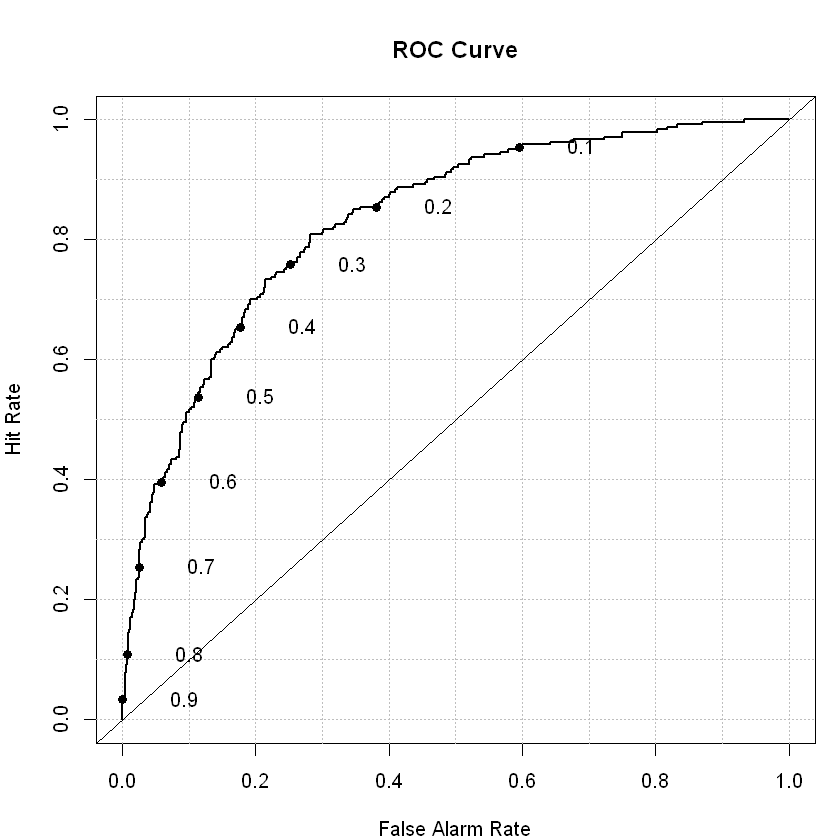

In [18]:
library(verification)
roc.plot(german_credit.train$response == "1", prob.insample)
roc.plot(german_credit.train$response == "1", prob.insample)$roc.vol$Area

b) Based on the summaries of the two models built in (1), select a subset of variables that could achieve the same or better accuracies than the same model built above using all predictors. Report the new models' accuracis in terms of precision, recall and F1 socre. 

Final model for GLM

In [19]:
credit.glm.final <- glm(response ~ chk_acct + duration +
                          credit_his + amount +
                          saving_acct  +
                          other_install + installment_rate,
                        family = binomial, german_credit.train)

In-sample misclassification rate

In [20]:
prob.glm1.insample <- predict(credit.glm.final, type = "response")
predicted.glm1.insample <- prob.glm1.insample > 0.1667
predicted.glm1.insample <- as.numeric(predicted.glm1.insample)
mean(ifelse(german_credit.train$response != predicted.glm1.insample, 1, 0))

[1] 0.385

c) Plot a ROC curve for each of the models built in (2) and report its AUC.

__Notice__: your models' accuracies will not be assessed for this assignment. However, you are encouraged to try different wrangling or variable selection techniques to obtain the highest accuracies you can. The aim of this question is to assess your understanding of modelling and interpretation of different model evaluation metrics.

In-sample AUC score

     Predicted
Truth   0   1
    0 278 282
    1  26 214

[1] 0.7946652

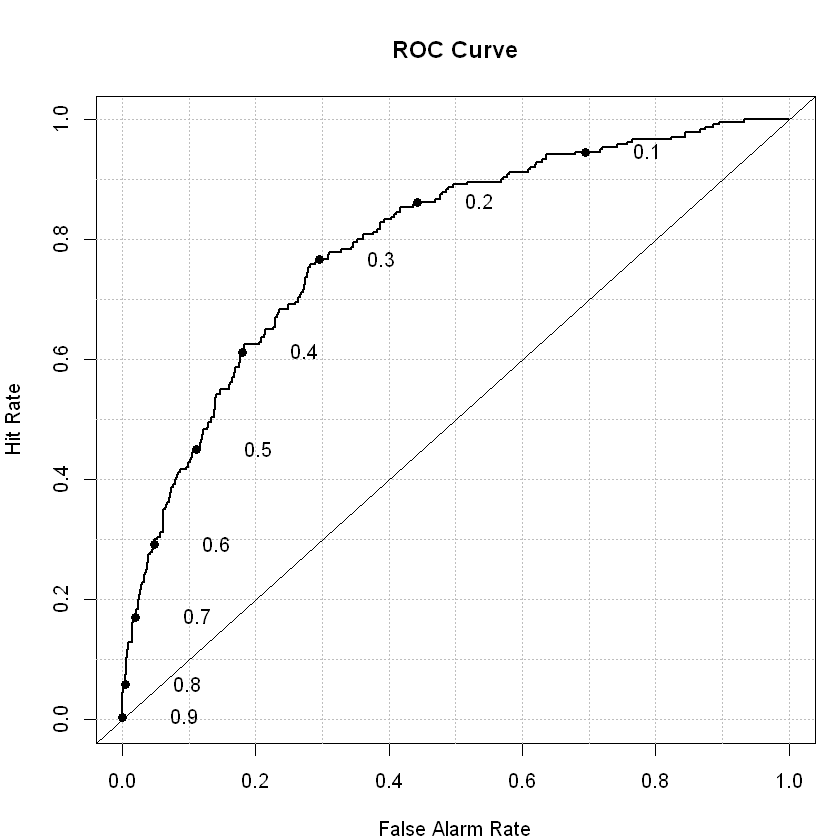

In [21]:
table(german_credit.train$response, predicted.glm1.insample, dnn = c("Truth", "Predicted"))
roc.plot(german_credit.train$response == "1", prob.glm1.insample)
roc.plot(german_credit.train$response == "1", prob.glm1.insample)$roc.vol$Area

 Out of sample misclassification rate and AUC score

     Predicted
Truth  0  1
    0 62 78
    1  7 53

[1] 0.425

[1] 0.7460714

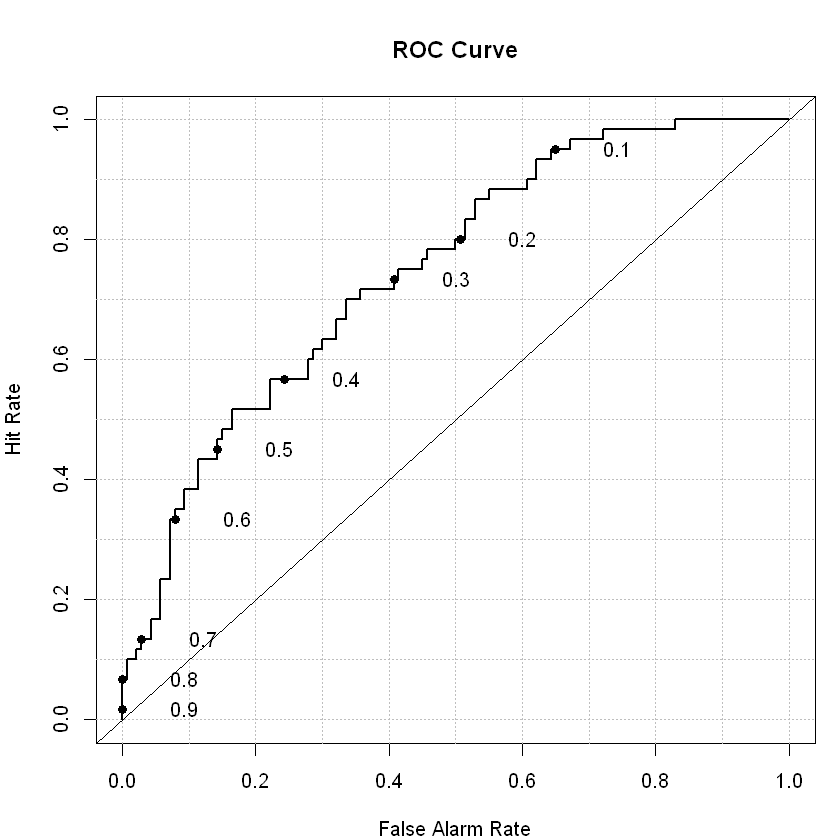

In [22]:
prob.glm1.outsample <- predict(credit.glm.final, 
                               german_credit.test, 
                               type = "response")
predicted.glm1.outsample <- prob.glm1.outsample > 0.1667
predicted.glm1.outsample <- as.numeric(predicted.glm1.outsample)
table(german_credit.test$response, 
      predicted.glm1.outsample, 
      dnn = c("Truth", "Predicted"))
mean(ifelse(german_credit.test$response != predicted.glm1.outsample, 
            1,
            0))
roc.plot(german_credit.test$response == "1",
         prob.glm1.outsample)
roc.plot(german_credit.test$response == "1", 
         prob.glm1.outsample)$roc.vol$Area

# Question 6 Rejection sampling
Given $p(x) =N(\mu=8, \sigma^2=4)+N(\mu=10, \sigma^2=25)$ that is a mixture of two Gaussian distributions. Implement the rejection sampling algorithm that samples data from $p(x)$.

__Total marks 15__. Part a 5 marks. Part b 10 marks.

a) Based on the density of $p(x)$, propose a distribution $q(x)$ s.t. $cq(x)$ covers $p(x)$ for a constant $c$. Plot $p(x)$ and $cq(x)$ in the same plot to justify your choice of $cq(x)$.

In [23]:
p.x <- function(n=1)
{
    return(rnorm(n, mean=8, sd=2) +
                rnorm(n, mean=10, sd=5))
}

RejectionSampling <- function(n)
{
    RN <- NULL
    for(i in 1:n)
    {
        OK <- 0
        while(OK<1)
        {
            U <- p.x()
            if(U <= p.x())
            {
                OK <- 1
                RN <- c(RN,U)
            }
        }
    }
    return(RN)
}

b) Implement the rejection sampling algorithm to sample 10000 data from $p(x)$ for $x \in [-10,50]$. Plot a histogram (or any other plot) to demonstrate that the sampled data roughly follows the original distribution $p(x)$.

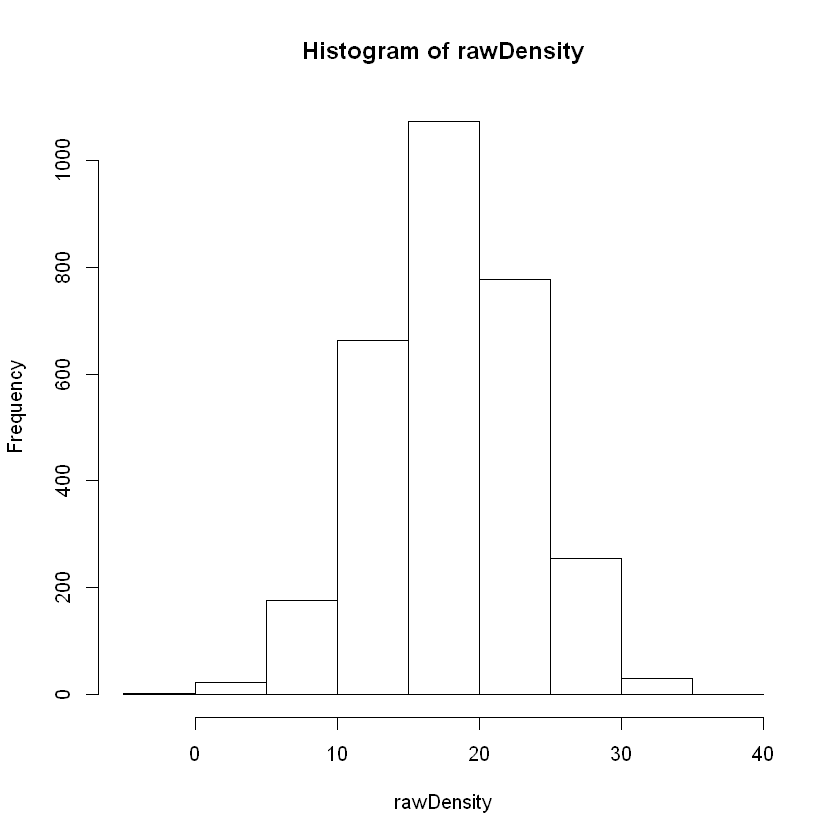

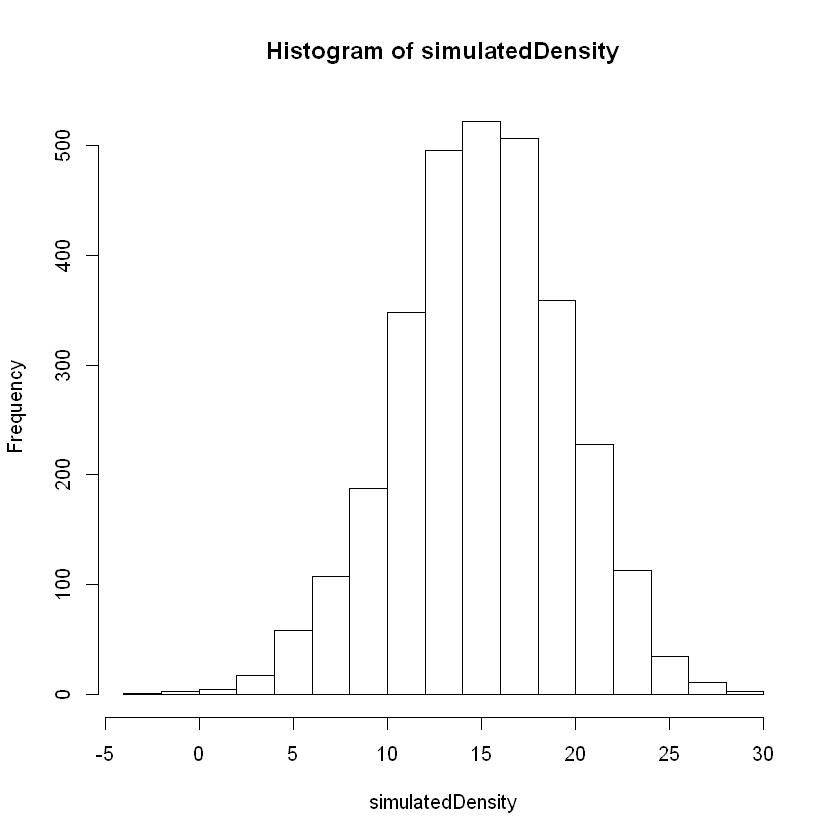

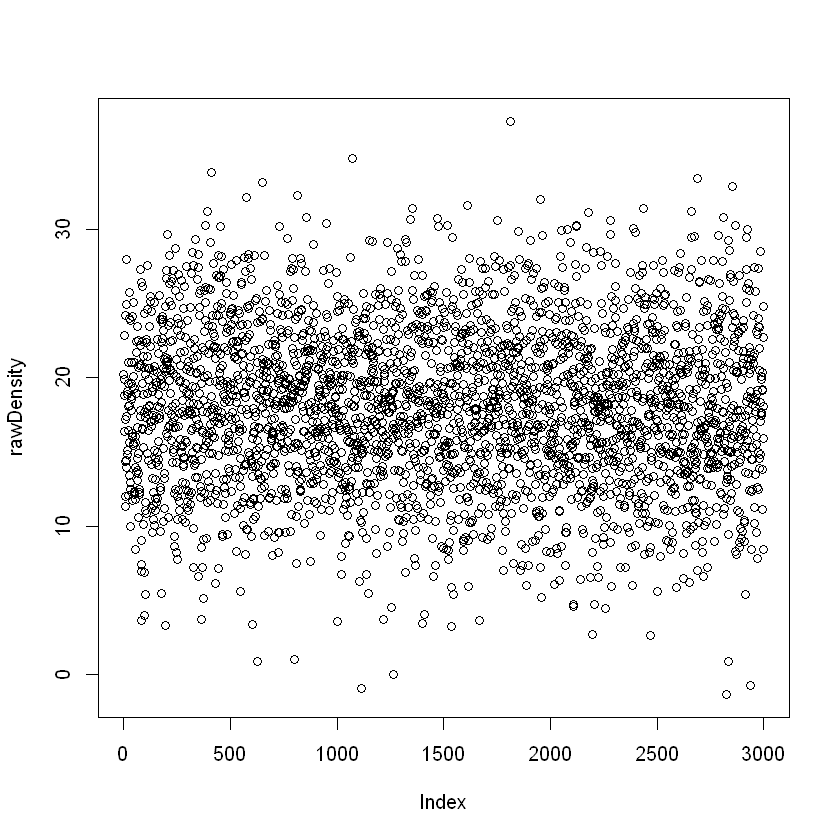

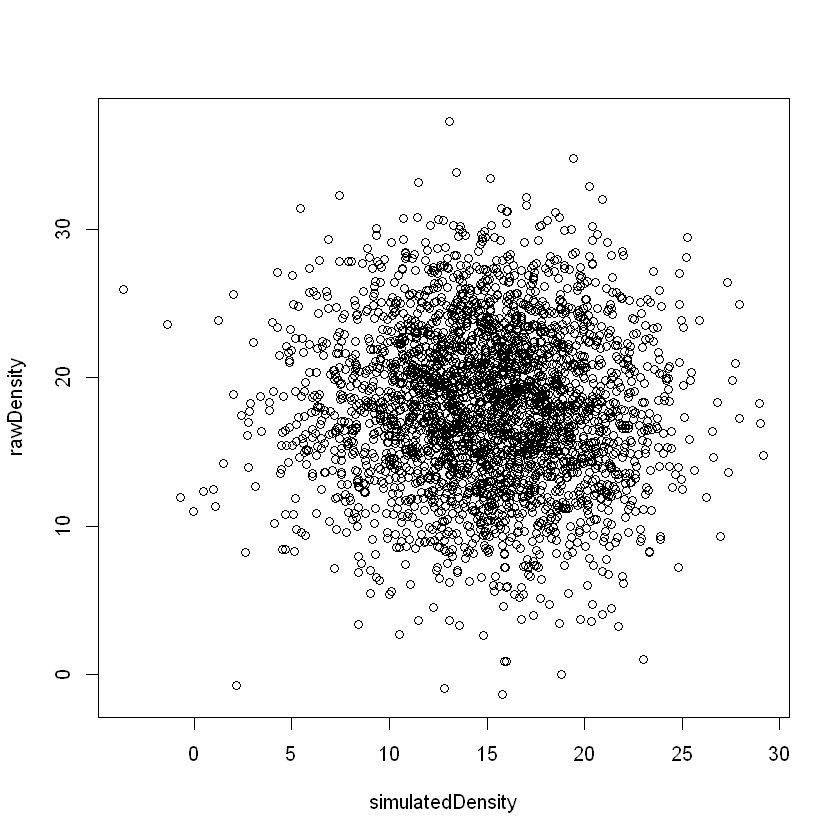

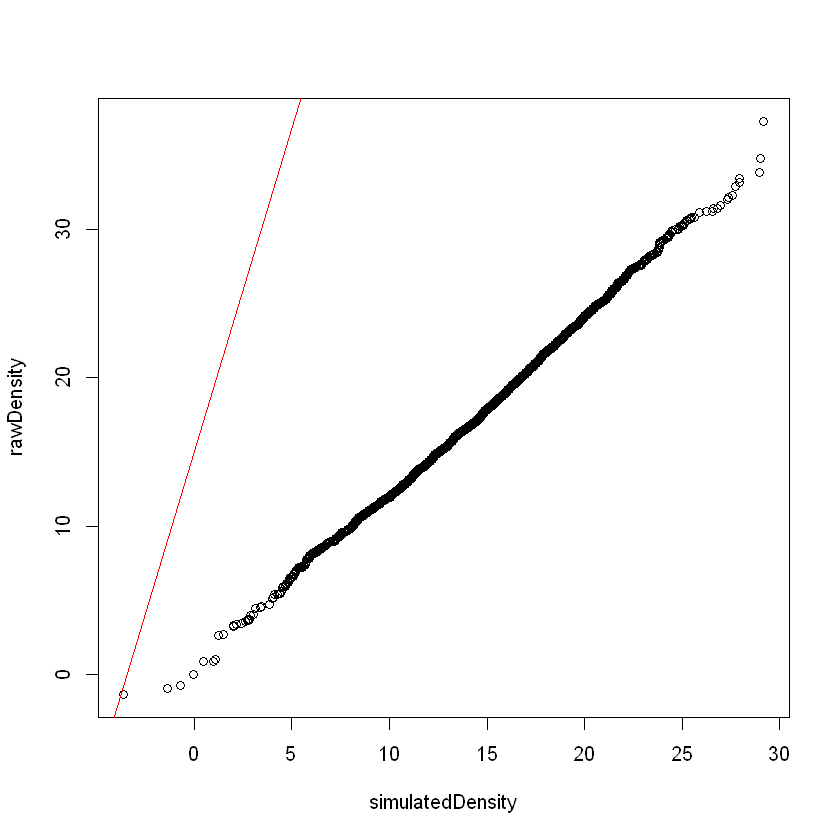

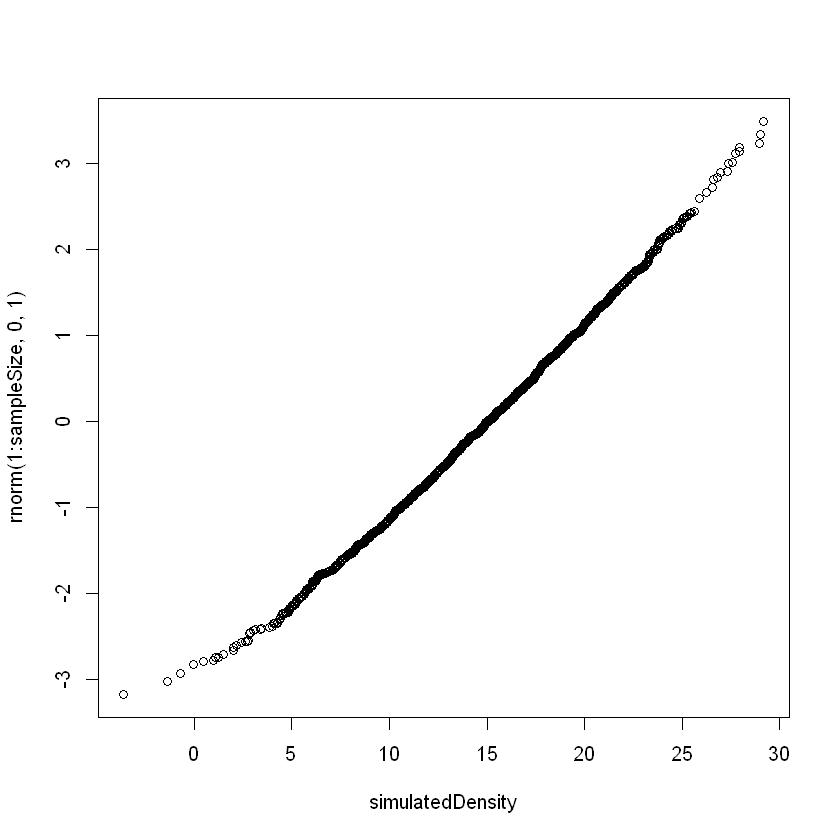

In [24]:
sampleSize <- 3000 
rawDensity <- p.x(sampleSize)
simulatedDensity <- RejectionSampling(sampleSize)
# Calculating the two histograms
histoRaw <- hist(rawDensity)
histoSimulated <- hist(simulatedDensity)
# Q-Q plot raw vs simulated densities
plot( rawDensity )
plot( simulatedDensity, rawDensity )
qqplot(simulatedDensity, rawDensity )
qqline(simulatedDensity, col = 2)
# qqplot( rawDensity, simulatedDensity);
# abline(0,1)
# for comparison Q-Q plot of simulated distribution is quite diff from original
qqplot(simulatedDensity, rnorm(1:sampleSize, 0, 1)) 